# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-02 18:00:04.536175


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/1/20


,10/1/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7277759,207789,2.86
Brazil,4847092,144680,2.98
India,6394068,99773,1.56
Mexico,748315,78078,10.43
United Kingdom,462775,42292,9.14
Italy,317409,35918,11.32
Peru,814829,32463,3.98


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/1/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
43939,US,7191637,2020-09-29,205986.0,914.0,42100.0,41408.000000
43938,US,7149537,2020-09-28,205072.0,316.0,33312.0,40960.142857
43937,US,7116225,2020-09-27,204756.0,266.0,36422.0,43696.142857
43936,US,7079803,2020-09-26,204490.0,740.0,44872.0,43666.428571
43935,US,7034931,2020-09-25,203750.0,952.0,50585.0,43549.000000
43934,US,6984346,2020-09-24,202798.0,914.0,44132.0,43282.000000
43933,US,6940214,2020-09-23,201884.0,1098.0,38433.0,43367.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/1/20


,10/1/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,460031,33159.0,7.21
New Jersey,205889,16140.0,7.84
Texas,776736,16130.0,2.08
California,822205,15973.0,1.94
Florida,709144,14444.0,2.04
Massachusetts,132870,9480.0,7.13
Illinois,297884,8940.0,3.00


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/1/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1521,California,815654,2020-09-29,15782.0,149.0,2943.0,3227.000000
1520,California,812711,2020-09-28,15633.0,27.0,2821.0,3230.714286
1519,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143
1518,California,807451,2020-09-26,15583.0,67.0,3791.0,3448.285714
1517,California,803660,2020-09-25,15516.0,123.0,4144.0,3452.714286
1516,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000
1515,California,796436,2020-09-23,15291.0,102.0,3371.0,3587.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/1/20


,10/1/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,271371,6610.0,2.44
Orange,53909,1268.0,2.35
Riverside,59488,1226.0,2.06
San Bernardino,55394,955.0,1.72
San Diego,47485,792.0,1.67
San Joaquin,20457,466.0,2.28
Sacramento,22654,420.0,1.85


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/1/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4823,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429
4822,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714
4821,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4820,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4819,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4818,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4817,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4816,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4815,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4814,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857



7 day new US cases as of 10/1/20


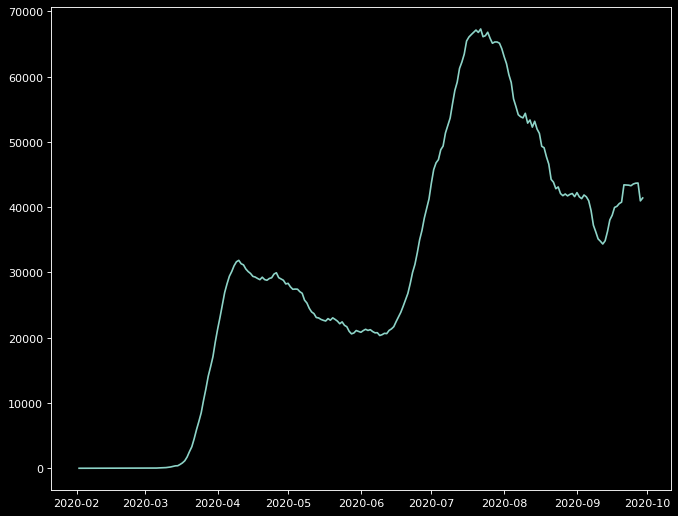

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/1/20


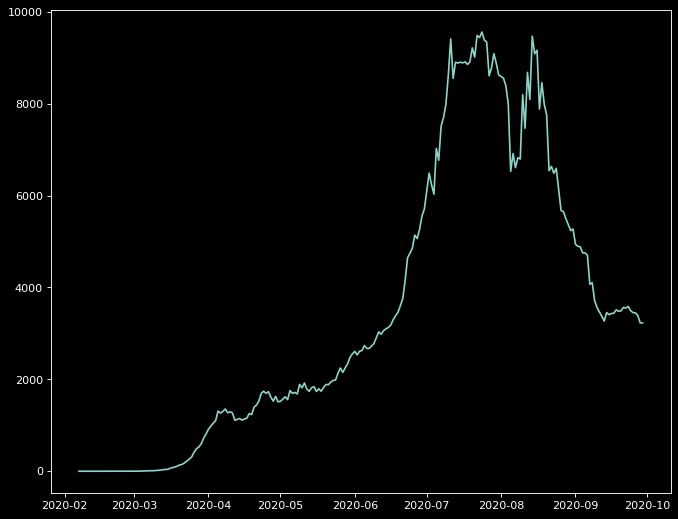

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/1/20


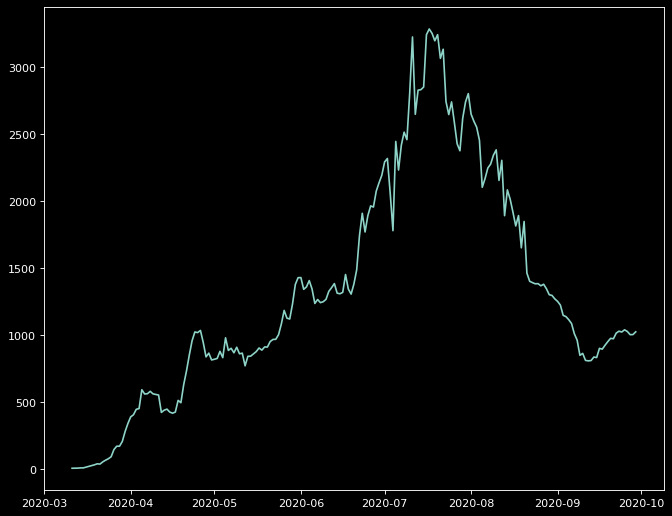

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()